In [1]:
#import required
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
#import data
ds=pd.read_csv('corona.csv')
ds.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
#convert date string to datetime
ds['Date']= pd.to_datetime(ds['Date'])

In [4]:
#get the date outr from the dataset
df_dates=pd.DataFrame()
df_dates['year']=ds['Date'].dt.year
df_dates['month']=ds['Date'].dt.month_name()
df_dates['day']=ds['Date'].dt.day_name()
df_dates['Confirmed']=ds['Confirmed']
df_dates['Recovered']=ds['Recovered']
df_dates['Deaths']=ds['Deaths']

In [5]:
df_dates.head()

,year,month,day,Confirmed,Recovered,Deaths
0,2020,January,Wednesday,0,0,0
1,2020,January,Wednesday,0,0,0
2,2020,January,Wednesday,0,0,0
3,2020,January,Wednesday,0,0,0
4,2020,January,Wednesday,0,0,0


In [6]:
df_dates.drop('year',axis=1,inplace=True)
df_dates.drop('day',axis=1,inplace=True)

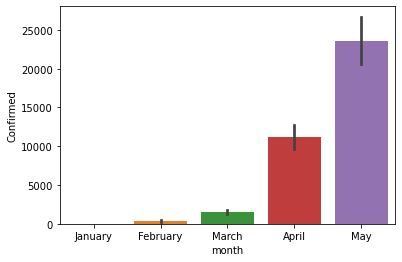

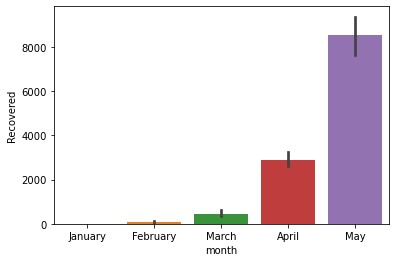

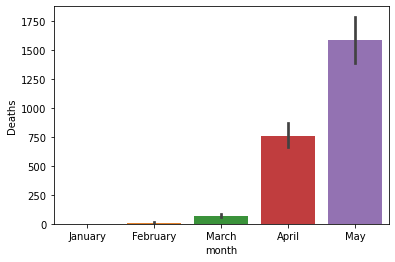

In [7]:
#Check dependency of deaths,confirmed and recovered on month
sns.barplot(x='month',y='Confirmed',data=df_dates)
plt.show()
sns.barplot(x='month',y='Recovered',data=df_dates)
plt.show()
sns.barplot(x='month',y='Deaths',data=df_dates)
plt.show()

In [8]:
#drop data and append month in original dataset
ds.drop('Date',axis=1,inplace=True)

In [9]:
ds['Month']=df_dates['month']

In [10]:
ds=ds[['Month','Country','Confirmed','Recovered','Deaths']]

In [11]:
ds.head()

,Month,Country,Confirmed,Recovered,Deaths
0,January,Afghanistan,0,0,0
1,January,Albania,0,0,0
2,January,Algeria,0,0,0
3,January,Andorra,0,0,0
4,January,Angola,0,0,0


In [12]:
ds['Month'].unique()

array(['January', 'February', 'March', 'April', 'May'], dtype=object)

In [13]:
ds['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [14]:
#label encode categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()    
for i  in ('Month','Country'):
    ds[i]=le.fit_transform(ds[i])

In [15]:
ds.head()

,Month,Country,Confirmed,Recovered,Deaths
0,2,0,0,0,0
1,2,1,0,0,0
2,2,2,0,0,0
3,2,3,0,0,0
4,2,4,0,0,0


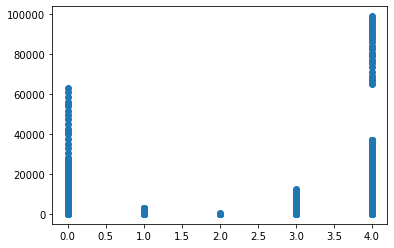

In [16]:
plt.scatter(ds['Month'],ds['Deaths'])

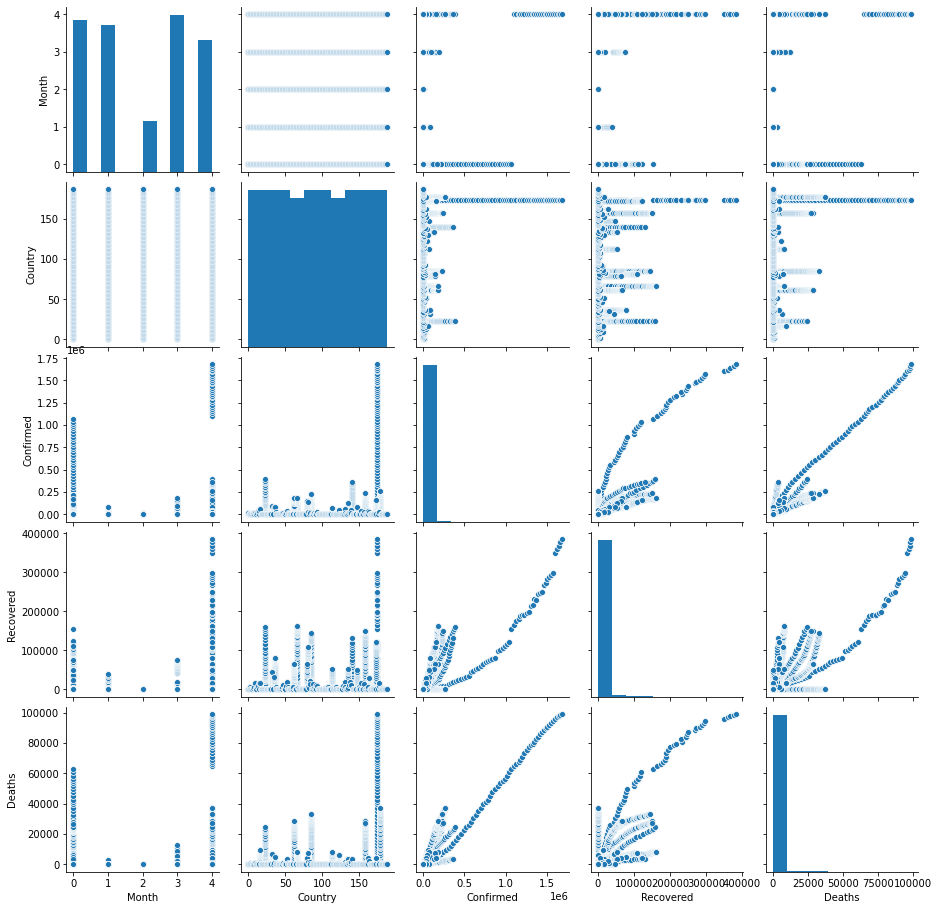

In [17]:
sns.pairplot(ds)

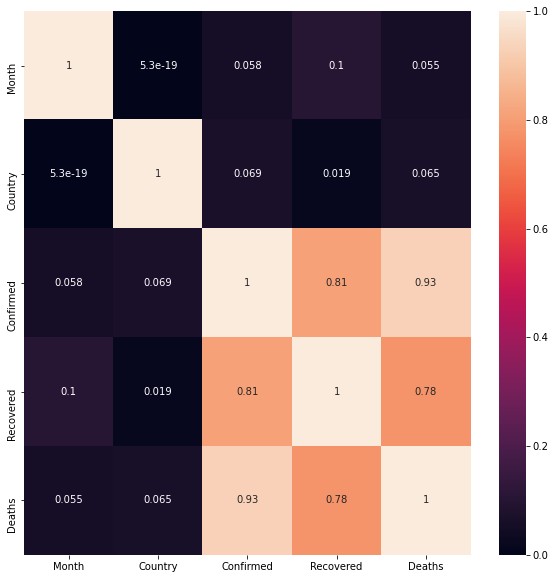

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(ds.corr(),color='k',annot=True)

In [18]:
x=ds.iloc[:,0:-1]
y=ds.iloc[:,-1]

In [19]:
#import algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [21]:
lr=LinearRegression()
rfr=RandomForestRegressor

In [ ]:
#this gave me singleton error
r2_scr= 0
random_state=0
for i in range (42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .22,random_state=i)
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    x=r2_score(y_test,pred)
    if x>r2_scr:
        r2_scr = x    

In [23]:
#divide data
x1=ds.iloc[:,0:-1]
x1.shape
y1=ds.iloc[:,-1]
y1.shape

(23688,)

In [24]:
#finding best random state for best r2scr
r2_scr = 0
random_state=0
for i in range (42,100):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=i)
    lr.fit(x1_train,y1_train)
    pred = lr.predict(x1_test)
    x=r2_score(y1_test,pred)
    if x>r2_scr:
        r2_scr = x
        random_state=i

In [25]:
print(r2_scr,random_state)

0.9162441780706088 96


In [30]:
#use randomforest regressor for better score
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x1_train,y1_train)
rfr.score(x1_train,y1_train)

0.9988990812692504

In [31]:
predicted=rfr.predict(x_test)

In [32]:
print(r2_score(y_test,predicted))

0.9953287122293113


In [ ]:
#finalize model

In [34]:
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = .22,random_state=96)
lr.fit(x1_train,y1_train)
y_pred = lr.predict(x1_test)
print(r2_score(y1_test,y_pred))

0.9162441780706088


In [35]:
import joblib
joblib.dump(lr,'corona_lr.pkl')

['corona_lr.pkl']